#**CSD458 HW5**
Classify Fashion MNist images using CNNs



### **PART A: Training Convolutional Neural Networks (CNNs)**


In [ ]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim



#### 1. Download the Fashion Mnist Dataset



#### 2. Define the Dataset, Dataloader, Transforms. Use v2.Compose() to include even more transforms, such as rotations, crops and others.



In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(28, padding=2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Define dataset using the transformations
dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Define dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

# Define validation dataset using the transformations
validation_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Define validation dataloader
validationloader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=True)

#### 3. Make your own version of CNN and report the validatation set accuracy



In [ ]:
# Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        output = self.fc2(x)
        return output

# Initialize the network and optimizer
model = Net()
optimizer = optim.Adadelta(model.parameters(), lr=1.0)

# Specify the loss function
criterion = nn.CrossEntropyLoss()

# Train the network
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(dataloader)}')

print('Finished Training')

# Test the network on the validation data
correct = 0
total = 0
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the validation set: {100 * correct / total}%')

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1, Loss: 0.7645877079605293
Epoch 2, Loss: 0.5590282439836053
Epoch 3, Loss: 0.49866588278683516
Epoch 4, Loss: 0.47108646239171914
Epoch 5, Loss: 0.4512639292903038
Epoch 6, Loss: 0.442837883875187
Epoch 7, Loss: 0.4384423271774737
Epoch 8, Loss: 0.42370295780363365
Epoch 9, Loss: 0.422589759153725
Epoch 10, Loss: 0.41999230138274396
Finished Training
Accuracy of the network on the validation set: 81.99%


#### 4. Make 2 variations of CNNs (using different convolutions or pooling parameters) and compare them.



In [ ]:
# Variation 1
# Define the first CNN architecture
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
# Variation 2

# Define the second CNN architecture
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5, 1)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Train and evaluate the first network
model1 = Net1()
optimizer1 = optim.Adadelta(model1.parameters(), lr=1.0)
# Train the network
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer1.zero_grad()

        # forward + backward + optimize
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer1.step()

        # print statistics
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(dataloader)}')

print('Finished Training')

# Test the network on the validation data
correct = 0
total = 0
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the validation set: {100 * correct / total}%')



# Train and evaluate the second network
model2 = Net2()
optimizer2 = optim.Adadelta(model2.parameters(), lr=1.0)
# Train the network
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer2.zero_grad()

        # forward + backward + optimize
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer2.step()

        # print statistics
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(dataloader)}')

print('Finished Training')

# Test the network on the validation data
correct = 0
total = 0
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the validation set: {100 * correct / total}%')




#### 5. Increase the number of Layers of the CNN (the number of convolutions followed by pooling layers) and observe what happens, in terms of the progress of the training and validation losses and the final model accuracies.



In [ ]:
# Define the CNN architecture
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = self.pool(nn.functional.relu(self.conv4(x)))
        x = x.view(-1, 256 * 2 * 2)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#### 6. Visualize some of the Feature Maps and Convolution Kernels that you find interesting.

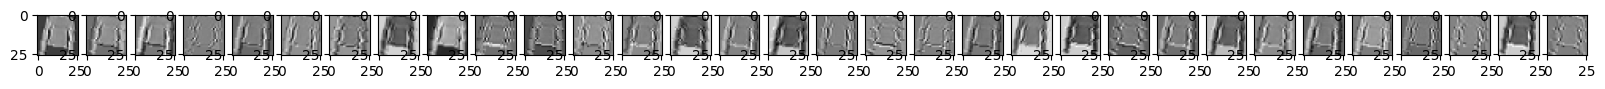

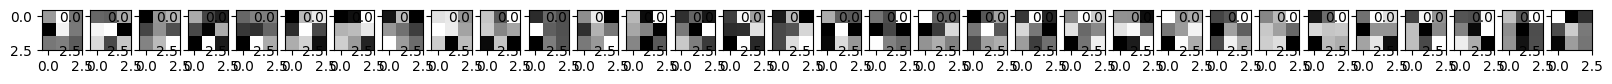

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
model.eval()  # Set the model to evaluation mode
# Get one batch of images from the dataloader
data, labels = next(iter(dataloader))



# Forward pass through the first convolutional layer
conv1_output = model.conv1(data)

# Detach the output from the computation graph and convert it to a numpy array
conv1_output = conv1_output.detach().numpy()

# Plot the feature maps
fig, axs = plt.subplots(1, conv1_output.shape[1], figsize=(20, 20))
for i in range(conv1_output.shape[1]):
    axs[i].imshow(conv1_output[0, i, :, :], cmap='gray')
plt.show()

# Visualize the convolutional kernels in the first layer
weights1 = model.conv1.weight.data
w = weights1.numpy()

# Plot the convolutional kernels
fig, axs = plt.subplots(1, w.shape[0], figsize=(20, 20))
for i in range(w.shape[0]):
    axs[i].imshow(w[i, 0, :, :], cmap='gray')
plt.show()

### **PART B: Transfer Learning**







#### 1. Load a Pretrained model (the simpler the better for computational efficiency e.g.resnet16). You are gonna use it to train your model on Fashion Mnist

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18

# Load the FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Load a pretrained ResNet model
model = resnet18(pretrained=True)

# Modify the first layer
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Change the final layer to match the number of classes in the FashionMNIST dataset
model.fc = torch.nn.Linear(512, 10)

# Define a loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


Finished Training


#### 2. Freeze the BackBone of the pretrained model (Convolutions etc) and modify the final fully connected layer/layers that perform classification (make sure the new output dimension matches the number of classes in Fashion Mnist)

In [ ]:
# Load a pretrained ResNet model
model = resnet18(pretrained=True)

# Modify the first layer
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer to match the number of classes in the FashionMNIST dataset
model.fc = torch.nn.Linear(512, 10)

# Now, only the parameters of the final layer have requires_grad=True
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Define a loss function
criterion = torch.nn.CrossEntropyLoss()

# Train the model
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    # print average loss over the epoch
    print('[%d] loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

print('Finished Training')

[1] loss: 1.260
[2] loss: 1.057
Finished Training


#### 3. Train the model on Fashion Mnist for a few epoches and log your train/val loss progress as well as the final model accuracy on the validation set.

In [ ]:
from sklearn.metrics import accuracy_score
# Load the validation set
valset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)

# Load a pretrained ResNet model
model = resnet18(pretrained=True)

# Modify the first layer
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Modify the final layer to match the number of classes in the FashionMNIST dataset
model.fc = torch.nn.Linear(512, 10)

# Define a loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Train the model
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    # print average loss over the epoch
    print('[%d] loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))

print('Finished Training')

# Evaluate the model on the validation set
model.eval()  # set the model to evaluation mode
with torch.no_grad():
    val_preds = []
    val_labels = []
    for data in valloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        val_preds.extend(predicted.numpy())
        val_labels.extend(labels.numpy())

# Compute the accuracy
accuracy = accuracy_score(val_labels, val_preds)
print('Accuracy on the validation set: %.2f%%' % (accuracy * 100))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Finished Training
Accuracy on the validation set: 64.20%


#### **Optional:** If you are interested you can also unfreeze the final convolutions of the pretrained model to Fine Tune it. You can even visualize the Feature Maps of you model.

#### *Guidelines*: The goal of this assignment is that you play around a little bit with terms and notions introduced. You don' t have to train your models for ages. 5-10 epoches will suffice. We just want to see that you can make a model properly, train it and log some results.